<a href="https://colab.research.google.com/github/goulartsursula/IntroPython-BetheBloch/blob/main/Estrutura%20da%20Materia%202/Espectroscopia_de_Raios_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tratamento de dados

> É necessário converter ângulo para comprimento de onda.
> $2 \ d \ \sin(\theta) = n \ \lambda$

d: distância

$\lambda$ : comprimento de onda

$\theta$ : ângulo

n : máximo de interferência

h : constante de Planck
> 6,6207.10-34 m².kg/s

c : velocidade da luz
> 299 792 458 m / s



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Dados

In [40]:
d_litio = 201.4e-12
d_potassio = 329.5e-12
h = 6.6207e-34
c = 2.99792458e8
n1 = 1
n2 = 2
k_alfa = 8048 
k_beta = 8905
eletronvolt = 1.60217733e-19
t = 9e-5
i01 = 1295.8 
i02 = 4432.8

###2. Espectro de Raios X - Fluoreto de Lítio (LiF)




In [160]:
datalif = pd.read_csv('Dados_EspectroscopiaRX_LiF.dat', sep='\s+')
datalif['thetarad'] = datalif['theta']*(np.pi/180)

#Calculando o niveis de energia da primeira ordem

litio_lamb11 = (2 * d_litio * np.sin(20.2*(np.pi/180)))/n1
litio_lamb12 = (2 * d_litio * np.sin(22.5*(np.pi/180)))/n1
litio_energia11 = ((h * c)/litio_lamb11) / eletronvolt
litio_energia12 = ((h * c)/litio_lamb12) / eletronvolt

print('Comprimento de onda 11:', litio_lamb11, '\nComprimento de onda 12:', litio_lamb12, '\nEnergia 11:', litio_energia11, '\nEnergia 12:', litio_energia12, '\n----------------')

#Calculando o niveis de energia da segunda ordem

litio_lamb21 = (2 * d_litio * np.sin(43.7*(np.pi/180)))/n2
litio_lamb22 = (2 * d_litio * np.sin(49.9*(np.pi/180)))/n2
litio_energia21 = ((h * c)/litio_lamb21) / eletronvolt
litio_energia22 = ((h * c)/litio_lamb22) / eletronvolt

print('Comprimento de onda 21:', litio_lamb21, '\nComprimento de onda 22:', litio_lamb22, '\nEnergia 21:', litio_energia21, '\nEnergia 22:', litio_energia22)

Comprimento de onda 11: 1.3908611455660976e-10 
Comprimento de onda 12: 1.5414488655665816e-10 
Energia 11: 8906.975441486202 
Energia 12: 8036.832322375531 
----------------
Comprimento de onda 21: 1.391437175908793e-10 
Comprimento de onda 22: 1.5405517014497216e-10 
Energia 21: 8903.288111432952 
Energia 22: 8041.512696014449


###3. Espectro de Raios X - Brometo de Potássio (KBr)

In [30]:
datakbr = pd.read_csv('Dados_ExpectroscopiaRX_KBr.dat', sep='\s+')
datakbr['thetarad'] = datakbr['theta']*(np.pi/180)

#Calculando o niveis de energia da primeira ordem

potassio_lamb11 = (2 * d_potassio * np.sin(12.1*(np.pi/180)))/n1
potassio_lamb12 = (2 * d_potassio * np.sin(13.4*(np.pi/180)))/n1
potassio_energia11 = ((h * c)/potassio_lamb11) / eletronvolt
potassio_energia12 = ((h * c)/potassio_lamb12) / eletronvolt

print('Comprimento de onda 11:', potassio_lamb11, '\nComprimento de onda 12:', potassio_lamb12, '\nEnergia 11:', potassio_energia11, '\nEnergia 12:', potassio_energia12,'\n-------------------')

#Calculando o niveis de energia da segunda ordem

potassio_lamb21 = (2 * d_potassio * np.sin(24.9*(np.pi/180)))/n2
potassio_lamb22 = (2 * d_potassio * np.sin(27.9*(np.pi/180)))/n2
potassio_energia21 = ((h * c)/potassio_lamb21) / eletronvolt
potassio_energia22 = ((h * c)/potassio_lamb22) / eletronvolt

print('Comprimento de onda 21:', potassio_lamb21, '\nComprimento de onda 22:', potassio_lamb22,'\nEnergia 21:', potassio_energia21, '\nEnergia 22:', potassio_energia22)

plt.show()

Comprimento de onda 11: 1.3813863295361857e-10 
Comprimento de onda 12: 1.527218684026497e-10 
Energia 11: 8968.06765869336 
Energia 12: 8111.717199145831 
-------------------
Comprimento de onda 21: 1.3873130050458829e-10 
Comprimento de onda 22: 1.541828737988589e-10 
Energia 21: 8929.755593017651 
Energia 22: 8034.852225050615


### 4. Espectro de absorção de raios X

In [157]:
#Correcao do tempo morto

data = pd.read_csv('Dados_Absorcao_Media.txt', sep='\s+')

data['n1'] = data['I1']/(1-(t*data['I1']))
data['n2'] = data['I2']/(1-(t*data['I2']))
data['n1/i01'] = data['n1']/i01 
data['n2/i02'] = data['n2']/i02
data['log(n1/i01)'] = np.log(data['n1']/i01) 
data['log(n2/i02)'] = np.log(data['n2']/i02)

#Ajuste Linear Primeiro Pico

x = data['d']
y = np.log(data['n1/i01'])

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

#Ajuste Linear Segundo Pico

r = data['d']
s = np.log(data['n2/i02'])

def lsq_sq(r, s):  
  n = np.size(s)
  mr, ms = np.mean(r), np.mean(s)

  cov = np.mean(r * s) - mr * ms
  var = np.var(r)

  c = cov/var
  d = ms - c *mr

  es = np.sqrt(np.sum(np.power(s - (c * r + d),2) / (n - 2)))
  
  erro_c = es / (np.sqrt(var) * np.sqrt(n))
  erro_d = erro_c * np.sqrt(np.mean(np.power(r, 2)))

  print(f'y = ({c} +- {erro_c})x +' + f'( {d} +- {erro_d})')
  return c, erro_c, d, erro_d

parametro = lsq_sq(r, s)
data.head(10)

y = (-9.430138623118964 +- 0.39971269190365366)x +( -0.011947128596654366 +- 0.047631264440259044)
y = (-13.88174984217387 +- 0.38484352639980196)x +( 0.4668294720285271 +- 0.045859398876654044)


,d,I1,I2,n1,n2,n1/i01,n2/i02,log(n1/i01),log(n2/i02)
0,0.04,849.6,3015.8,919.942482,4139.295999,0.709942,0.933788,-0.342572,-0.068506
1,0.06,657.4,2377.8,698.741755,3025.198537,0.539236,0.682458,-0.617602,-0.382055
2,0.08,554.8,1796.6,583.958201,2143.131506,0.450655,0.483471,-0.797054,-0.726763
3,0.10,453.0,1575.0,472.253787,1835.129624,0.364450,0.413989,-1.009367,-0.881916
4,0.12,419.0,1258.0,435.419676,1418.615666,0.336024,0.320027,-1.090573,-1.139350
5,0.14,354.0,937.0,365.649596,1023.294418,0.282181,0.230846,-1.265208,-1.466004
6,0.16,273.8,726.8,280.717439,777.668877,0.216636,0.175435,-1.529535,-1.740486
7,0.18,222.4,529.4,226.942481,555.885732,0.175137,0.125403,-1.742187,-2.076224


### 5. Gráficos

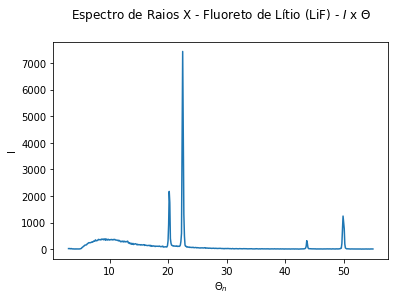

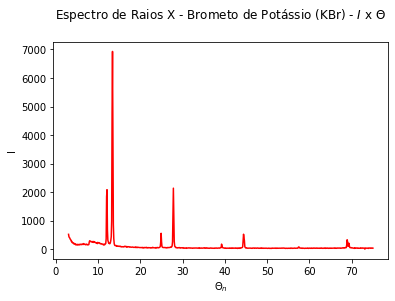

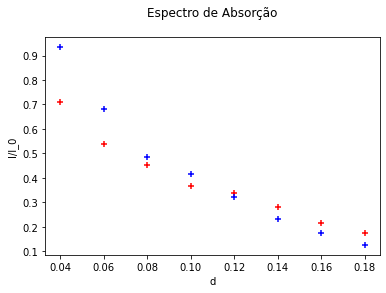

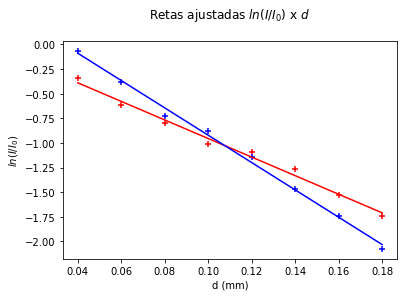

In [161]:
#Espectro de Raios X - Fluoreto de Lítio (LiF) - I x theta
plt.plot(datalif['theta'], datalif['I'])
plt.title('Espectro de Raios X - Fluoreto de Lítio (LiF) - $I$ x $\Theta$\n')
plt.xlabel('$\Theta_n$')
plt.ylabel('I')
plt.show()

#Espectro de Raios X - Brometo de Potássio (KBr) - I x theta
plt.plot(datakbr['theta'], datakbr['I'], color='red')
plt.title('Espectro de Raios X - Brometo de Potássio (KBr) - $I$ x $\Theta$\n')
plt.xlabel('$\Theta_n$')
plt.ylabel('I')
plt.show()

#Espectro Absorcao - I/I0 x d
plt.scatter(data['d'], data['n1/i01'], marker='+', color='red')
plt.scatter(data['d'], data['n2/i02'], marker='+',color='blue')
plt.title('Espectro de Absorção\n')
plt.xlabel('d')
plt.ylabel('I/I_0')
plt.show()

#Gráfico do Ajuste Linear

plt.scatter(data['d'], np.log(data['n1/i01']), marker='+', color='red')
plt.plot(data['d'], parametros[0]*data['d']+parametros[2], color='red')

plt.scatter(data['d'], np.log(data['n2/i02']), marker='+', color='blue')
plt.plot(data['d'], parametro[0]*data['d']+parametro[2], color='blue')
plt.title('Retas ajustadas $ln (I/I_0)$ x $d$\n')
plt.xlabel('d (mm)')
plt.ylabel('$ln(I/I_0)$')
plt.show()